# Resumos e um pouco de Visualização no pandas


## Resumo

Vamos ver alguns métodos para analisar nossas tabelas (dataframes)

Além disso, vamos usar os plot de gráfico padrões do pandas, mas no projeto de DataScience veremos outras mais bonitas e também muito práticas.

OBS: O pandas usa o matplotlib (que vimos na seção de "módulos e bibliotecas") para plotar gráficos.<br>
Se quiser personalizar mais do que o padrão do pandas, importe o matplotlib e use os métodos do matplotlib

- Preparando as bases de dados (o que fizemos na última aula)

In [2]:
import pandas as pd
#importando os arquivos
vendas_df = pd.read_csv(r'C:\Users\Giovani Dantas\Desktop\python\exemplos_zip_geralzao\Tratamento de Dados e Múltiplas Bases\Contoso - Vendas - 2017.csv', sep=';')
produtos_df = pd.read_csv(r'Contoso - Cadastro Produtos.csv', sep=';')
lojas_df = pd.read_csv(r'Contoso - Lojas.csv', sep=';')
clientes_df = pd.read_csv(r'Contoso - Clientes.csv', sep=';')

#limpando apenas as colunas que queremos
clientes_df = clientes_df[['ID Cliente', 'E-mail']]
produtos_df = produtos_df[['ID Produto', 'Nome do Produto']]
lojas_df = lojas_df[['ID Loja', 'Nome da Loja']]

#mesclando e renomeando os dataframes
vendas_df = vendas_df.merge(produtos_df, on='ID Produto')
vendas_df = vendas_df.merge(lojas_df, on='ID Loja')
vendas_df = vendas_df.merge(clientes_df, on='ID Cliente').rename(columns={'E-mail': 'E-mail do Cliente'})
display(vendas_df)

C:\Users\Giovani Dantas\AppData\Local\Temp\ipykernel_10588\507084374.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail do Cliente
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,rbrumfieldmy@ameblo.jp
1,2,01/01/2017,06/01/2017,5,308,1586,2,18469,9,1,SV DVD 55DVD Storage Binder M56 Black,Loja Contoso North America Reseller,cshawd4@technorati.com
2,3,01/01/2017,01/01/2017,0,294,1444,5,19730,13,1,"The Phone Company Touch Screen Phones 26-2.2"" ...",Loja Contoso Tehran No.2,kgorriekd@bandcamp.com
3,4,01/01/2017,01/01/2017,0,251,1468,5,29326,6,1,Contoso Touch Screen Phones - CRT M11 Black,Loja Contoso Singapore,angela49@adventure-works.com
4,5,01/01/2017,07/01/2017,6,94,1106,2,22617,4,1,Contoso SLR Camera M146 Orange,Loja Contoso Grand Prairie,jacob4@adventure-works.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...
980637,980638,31/12/2017,31/12/2017,0,194,2490,4,10353,120,0,Contoso Rubberized Skin BlackBerry E100 White,Loja Contoso Ridgely,ocrosson9u@illinois.edu
980638,980639,31/12/2017,06/01/2018,6,32,2488,4,31750,120,0,Contoso Rubberized Skin BlackBerry E100 Black,Loja Contoso Milliken,victor11@adventure-works.com
980639,980640,31/12/2017,03/01/2018,3,210,2511,10,12003,80,0,Contoso Original K1m Li-Ion Standard Battery E...,Loja Contoso Cheshire,mtopaz4@gmpg.org
980640,980641,31/12/2017,31/12/2017,0,53,436,4,25550,39,0,Adventure Works Desktop PC1.80 ED180 White,Loja Contoso East Troy,lance5@adventure-works.com


### Qual cliente que comprou mais vezes?

- Usaremos o método .value_counts() para contar quantas vezes cada valor do Dataframe aparece
- Usaremos o método .plot() para exibir um gráfico

E-mail do Cliente
karen33@adventure-works.com      77
chloe77@adventure-works.com      74
julia43@adventure-works.com      69
gilbert9@adventure-works.com     68
destiny66@adventure-works.com    68
                                 ..
mblemen9o@ebay.com                1
rebecca15@adventure-works.com     1
kevin10@adventure-works.com       1
siliffe8l@spotify.com             1
clifford8@adventure-works.com     1
Name: count, Length: 38907, dtype: int64

<Axes: xlabel='E-mail do Cliente'>

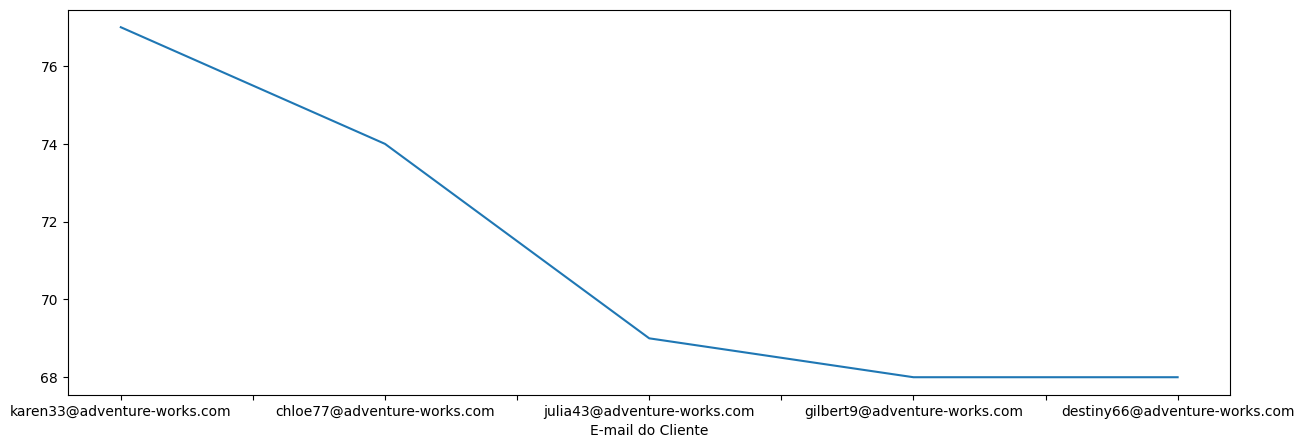

In [3]:
frequencia_clientes = vendas_df['E-mail do Cliente'].value_counts()
display(frequencia_clientes)
frequencia_clientes[:5].plot(figsize=(15, 5))

### Qual a Loja que mais vendeu?

- Usaremos o .groupby para agrupar o nosso dataframe, de acordo com o que queremos (somando as quantidades de vendas, por exemplo)

In [4]:
vendas_lojas = vendas_df.groupby('Nome da Loja').sum()
vendas_lojas = vendas_lojas[['Quantidade Vendida']]
display(vendas_lojas)

,Quantidade Vendida
Nome da Loja,
Loja Contoso Albany,26353
Loja Contoso Alexandria,26247
Loja Contoso Amsterdam,28294
Loja Contoso Anchorage,27451
Loja Contoso Annapolis,26065
...,...
Loja Contoso Yokohama,28023
Loja Contoso York,27164
Loja Contoso koln No.1,29046


- Agora precisamos pegar o maior valor. Temos 2 formas:
    1. Ordenar o dataframe em ordem decrescente de Quantidade Vendida
        - Método .sort_values
    2. Pegar o Maior valor diretamente
        - Métodos .max() e .idxmax()

,Quantidade Vendida
Nome da Loja,
Loja Contoso Catalog,1029117
Loja Contoso North America Online,701961
Loja Contoso Europe Online,616845
Loja Contoso Asia Online,578458
Loja Contoso North America Reseller,520176
...,...
Loja Contoso Berlin,379
Loja Contoso Paterson,371
Loja Contoso Marseille,370


<Axes: xlabel='Nome da Loja'>

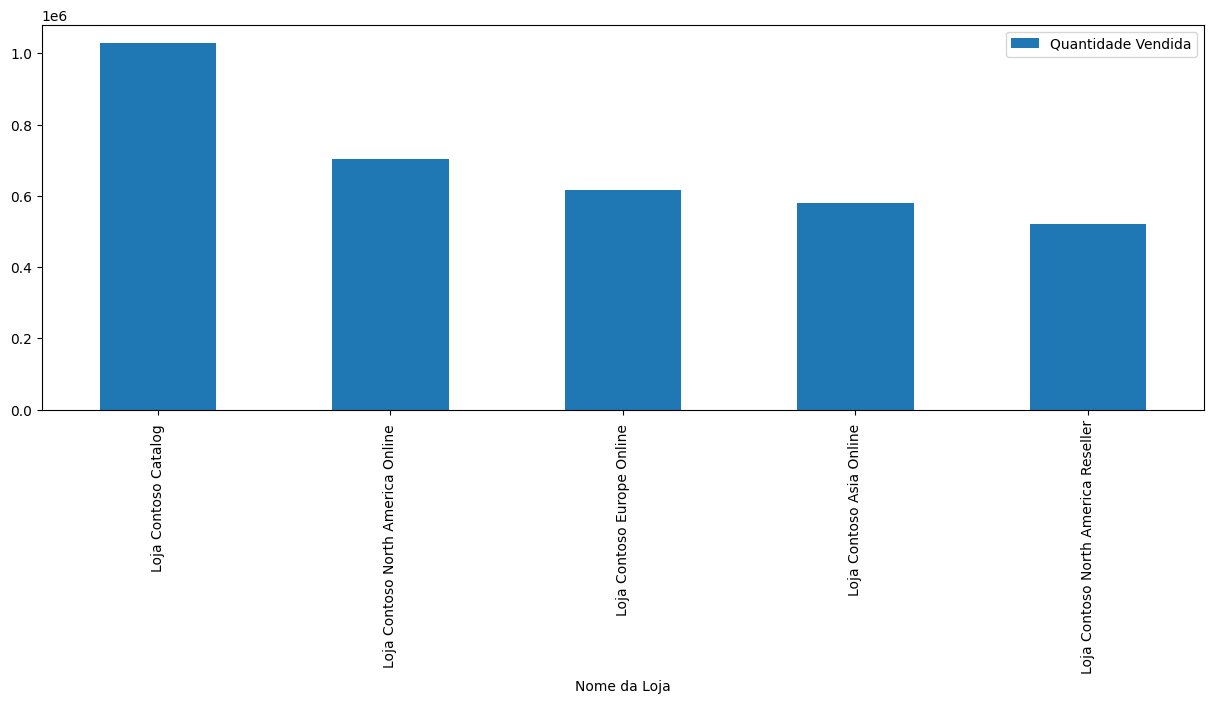

In [5]:
#ordenando o dataframe
vendas_lojas = vendas_lojas.sort_values('Quantidade Vendida', ascending = False)
display(vendas_lojas)
#podemos plotar em um gráfico
vendas_lojas[:5].plot(figsize=(15, 5), kind='bar')

In [6]:
#pegando o maior valor e se índice
maior_valor = vendas_lojas['Quantidade Vendida'].max()
melhor_loja = vendas_lojas['Quantidade Vendida'].idxmax()
print(melhor_loja, maior_valor)

Loja Contoso Catalog  1029117


### Qual produto que menos vendeu?

- Já temos uma lista criada para isso, basta verificarmos o final da lista (já que ela está ordenada) ou então usarmos os métodos:
    1. min()
    2. idxmin()

In [7]:
#vendas_lojas[-1:]

vendas_lojas = vendas_df.groupby('Nome da Loja').sum()
vendas_lojas = vendas_lojas[['Quantidade Vendida']]
display(vendas_lojas)

#ordenando o dataframe
vendas_lojas = vendas_lojas.sort_values('Quantidade Vendida', ascending = True)
display(vendas_lojas)
#podemos plotar em um gráfico
display(vendas_lojas[:1]) 

,Quantidade Vendida
Nome da Loja,
Loja Contoso Albany,26353
Loja Contoso Alexandria,26247
Loja Contoso Amsterdam,28294
Loja Contoso Anchorage,27451
Loja Contoso Annapolis,26065
...,...
Loja Contoso Yokohama,28023
Loja Contoso York,27164
Loja Contoso koln No.1,29046


,Quantidade Vendida
Nome da Loja,
Loja Contoso Venezia,234
Loja Contoso Racine No.2,253
Loja Contoso Marseille,370
Loja Contoso Paterson,371
Loja Contoso Berlin,379
...,...
Loja Contoso North America Reseller,520176
Loja Contoso Asia Online,578458
Loja Contoso Europe Online,616845


,Quantidade Vendida
Nome da Loja,
Loja Contoso Venezia,234


# DESAFIO PRO PATRÃO, CRIAR UMA TABELA SÓ COM A DA EUROPA Q NN TIVERAM DEVOLUÇÃO, QUANTAS VENDAS SÃO? 


In [9]:
loja306semdev = vendas_df[(vendas_df["ID Loja"] == 306) & (vendas_df["Quantidade Devolvida"] == 0)]

display(loja306semdev)

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail do Cliente
98,99,01/01/2017,03/01/2017,2,306,1269,10,26238,8,0,Contoso Carrying Case E312 Blue,Loja Contoso Europe Online,edward17@adventure-works.com
165,166,01/01/2017,02/01/2017,1,306,1107,10,7242,16,0,"Contoso SLR Camera 35"" M358 Orange",Loja Contoso Europe Online,khanhard6r@taobao.com
166,167,01/01/2017,05/01/2017,4,306,242,10,34277,16,0,Contoso Home Theater System 7.1 Channel M1700 ...,Loja Contoso Europe Online,marshall24@adventure-works.com
186,187,01/01/2017,06/01/2017,5,306,1479,10,23132,8,0,The Phone Company Smart phones Unlocked Intern...,Loja Contoso Europe Online,cynthia4@adventure-works.com
198,199,01/01/2017,03/01/2017,2,306,819,10,5363,4,0,Contoso Laptop Cooling Hub notebook fan with 4...,Loja Contoso Europe Online,svirgoea4@blogtalkradio.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...
980579,980580,31/12/2017,06/01/2018,6,306,771,10,6539,8,0,Contoso USB Wave Multi-media Keyboard E280 Black,Loja Contoso Europe Online,hgauntleyf0@smh.com.au
980580,980581,31/12/2017,01/01/2018,1,306,591,10,32061,8,0,Contoso Projector 480p M480 White,Loja Contoso Europe Online,gina18@adventure-works.com
980581,980582,31/12/2017,31/12/2017,0,306,1388,10,22838,8,0,Contoso Private Branch Exchange M88 Grey,Loja Contoso Europe Online,alexa14@adventure-works.com
980582,980583,31/12/2017,03/01/2018,3,306,1354,10,33450,8,0,Contoso Hybrid system M60 White,Loja Contoso Europe Online,alexis3@adventure-works.com
